In [ ]:
# Dependencies:
from tensorflow.keras import layers, models, Model, Input, regularizers, optimizers, metrics, losses, initializers, backend, callbacks
from tensorflow import dtypes, float32, float64
backend.clear_session()

import numpy
import matplotlib.pylab as plt
from matplotlib.pyplot import figure

In [ ]:
#Data
N_examples = 100 # Number of examples
n_inputSize = 2 # Number of explicative variables
m_outputSize = 1 # Number of explained variables

# Initialize Ne random examples (real values between 0 and 1):
X_input = numpy.random.rand(N_examples,n_inputSize)
Y_output = numpy.random.rand(N_examples,m_outputSize)
for i, x in enumerate(X_input):
  Y_output[i] = 0.01*Y_output[i] + (x[0] ** 3) + 0.2 # y = x1 ^ 3 + epsilon

print(X_input[0])
print(Y_output[0])

[0.50389634 0.59183087]
[0.33139366]


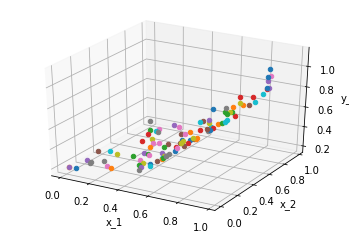

In [ ]:
#Plot data:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for i in range(X_input.shape[0]):
  x_1 = X_input[i][0]
  x_2 = X_input[i][1]
  y_1 = Y_output[i][0]
  ax.scatter(x_1, x_2, y_1, marker='o')

ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('y_1')

plt.show()

In [ ]:
#Hyperparameters:

# N=2 #Depth of the multilayer perceptron
n_1 = n_inputSize + 1 # width of the first hidden layer
n_2 = n_inputSize + 1 # width of the second hidden layer
g_1 = 'relu' # activation function of the first hidden layer
g_2 = 'sigmoid' # activation function of the second hidden layer
g_out = 'linear' # activation function of the output layer
# For instance: relu, sigmoid, softmax, linear

inputLayer = layers.Input(shape=(n_inputSize,))
hiddenLayer_1 = layers.Dense(n_1, kernel_initializer=initializers.RandomUniform(), activation=g_1)(inputLayer)
hiddenLayer_2 = layers.Dense(n_2, kernel_initializer=initializers.GlorotUniform(), activation=g_2)(hiddenLayer_1)
outputLayer = layers.Dense(m_outputSize, kernel_initializer=initializers.GlorotUniform(), activation=g_out)(hiddenLayer_2)
architecture = Model(inputs=inputLayer, outputs=outputLayer)

loss_function = 'mean_squared_error'
my_optimizer = optimizers.SGD(learning_rate = 0.1) # SGD = Stochastic Gradient Descent
nbEpochs = 2000 # Stopping method: set a limit number of training epochs
batchSize = N_examples # See all the examples before backpropagate (aka initial gradient descent)

#Info
architecture.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense (Dense)               (None, 3)                 9         
                                                                 
 dense_1 (Dense)             (None, 3)                 12        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


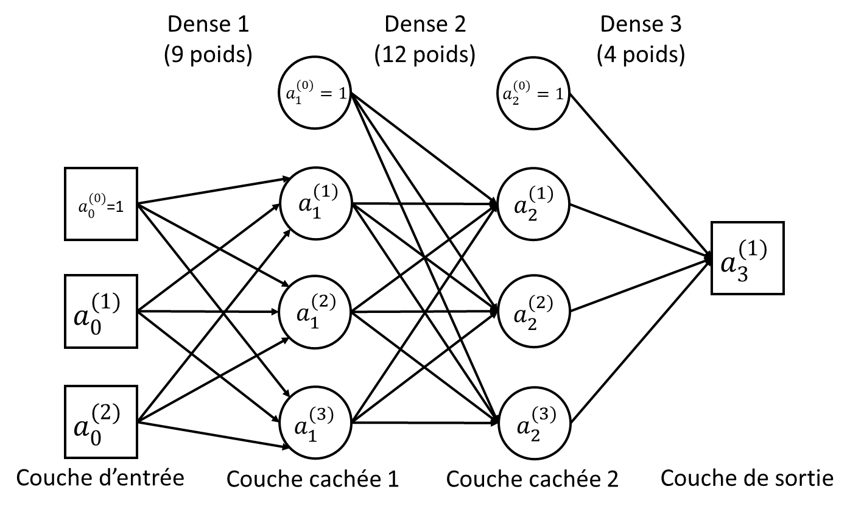

In [ ]:
#Training
architecture.compile(loss=loss_function, optimizer=my_optimizer)
history = architecture.fit(X_input, Y_output, epochs=nbEpochs, batch_size=batchSize, verbose=0)

dict_keys(['loss'])


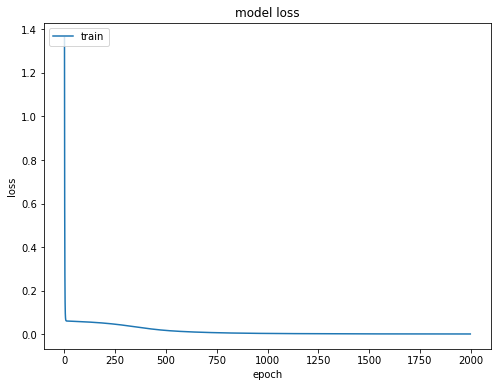

In [ ]:
# Show loss during training:

print(history.history.keys())

figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

del history

0.21029115
0.31479347
1.0064197


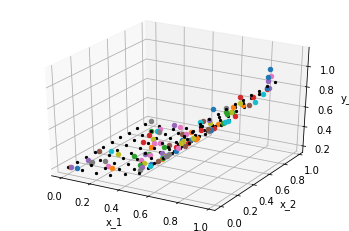

In [ ]:
#Plot data and trained model:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for i in range(X_input.shape[0]):
  x_1 = X_input[i][0]
  x_2 = X_input[i][1]
  y_1 = Y_output[i][0]
  ax.scatter(x_1, x_2, y_1, marker='o')

size=10
carpet = numpy.zeros((size,size))
for i in range(carpet.shape[0]):
  for j in range(carpet.shape[0]):
    x_1_test = i / size
    x_2_test = j / size
    y_1_pred = architecture.predict([[x_1_test,x_2_test]])[0][0]
    ax.scatter(x_1_test, x_2_test, y_1_pred, marker='.', c="black")

ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('y_1')

pred=architecture.predict([[0,0]])
print(pred[0][0])
pred=architecture.predict([[0.5,0.5]])
print(pred[0][0])
pred=architecture.predict([[1.0,1.0]])
print(pred[0][0])

plt.show()